In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn import tree
import autokeras as ak
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
import tensorflow
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
new_path = os.path.join(os.getcwd(),'data_Xentech')
new_path

f_lists = os.listdir(new_path)
print("File Lists : ", f_lists)

File Lists :  ['data-2022.09.06.csv', 'data-2022.09.07.csv', 'data-2022.09.08.csv', 'data-2022.09.09.csv', 'data-2022.09.10.csv', 'data-2022.09.13.csv', 'data-2022.09.14.csv', 'data-2022.09.15.csv', 'data-2022.09.16.csv', 'data-2022.09.17.csv', 'data-2022.09.23.csv', 'data-2022.09.24.csv', 'data-2022.09.27.csv', 'data-2022.09.28.csv', 'data-2022.09.29.csv', 'data-2022.09.30.csv', 'data-2022.10.01.csv', 'data-2022.10.05.csv', 'data-2022.10.06.csv', 'data-2022.10.07.csv', 'data-2022.10.08.csv', 'data-2022.10.12.csv', 'data-2022.10.13.csv', 'data-2022.10.14.csv', 'data-2022.10.15.csv', 'data-2022.10.18.csv', 'data-2022.10.19.csv', 'data-2022.10.20.csv', 'data-2022.10.21.csv', 'data-2022.10.22.csv', 'data-2022.10.25.csv', 'data-2022.10.26.csv', 'data-2022.10.27.csv', 'Error Lot list.csv']


In [3]:
dataList=list()
cnt = 0

for pth in glob.glob(new_path+'/*')[:-1]:
    origin = pd.read_csv(pth,index_col=False)
    origin['Date'] = "-".join(pth.split('-')[-1].split(".")[:-1])
    cnt = cnt+len(origin)
    dataList.append(origin)

CatList=pd.concat(dataList,axis=0,ignore_index=True)
CatList

,Index,Lot,Time,pH,Temp,Current,Date
0,1,1,오후 4:29:15.0,10.37,42.87,7.34,2022-09-06
1,2,1,오후 4:29:20.0,10.90,42.70,8.26,2022-09-06
2,3,1,오후 4:29:25.0,9.61,42.37,8.46,2022-09-06
3,4,1,오후 4:29:30.0,10.32,45.85,8.04,2022-09-06
4,5,1,오후 4:29:35.0,10.36,44.18,7.23,2022-09-06
...,...,...,...,...,...,...,...
50089,1514,22,오후 6:39:05.9,9.79,43.52,8.55,2022-10-27
50090,1515,22,오후 6:39:10.9,9.53,44.44,7.36,2022-10-27
50091,1516,22,오후 6:39:15.9,9.86,46.54,8.15,2022-10-27
50092,1517,22,오후 6:39:20.9,10.52,47.88,7.97,2022-10-27


In [4]:
df = CatList.drop(['Index','Time'], axis=1, inplace=False)
df

,Lot,pH,Temp,Current,Date
0,1,10.37,42.87,7.34,2022-09-06
1,1,10.90,42.70,8.26,2022-09-06
2,1,9.61,42.37,8.46,2022-09-06
3,1,10.32,45.85,8.04,2022-09-06
4,1,10.36,44.18,7.23,2022-09-06
...,...,...,...,...,...
50089,22,9.79,43.52,8.55,2022-10-27
50090,22,9.53,44.44,7.36,2022-10-27
50091,22,9.86,46.54,8.15,2022-10-27
50092,22,10.52,47.88,7.97,2022-10-27


In [5]:
df.shape

(50094, 5)

In [6]:
df.describe()

,Lot,pH,Temp,Current
count,50094.000000,50094.000000,50094.000000,50094.000000
mean,11.500000,10.273346,45.023847,7.974549
std,6.344352,0.453278,1.661687,0.601907
min,1.000000,9.510000,42.010000,5.510000
25%,6.000000,9.900000,43.670000,7.500000
50%,11.500000,10.260000,45.020000,7.990000
75%,17.000000,10.630000,46.360000,8.470000
max,22.000000,11.990000,51.980000,8.990000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50094 entries, 0 to 50093
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Lot      50094 non-null  int64  
 1   pH       50094 non-null  float64
 2   Temp     50094 non-null  float64
 3   Current  50094 non-null  float64
 4   Date     50094 non-null  object 
dtypes: float64(3), int64(1), object(1)
memory usage: 1.9+ MB


In [8]:
df.isnull().sum()

Lot        0
pH         0
Temp       0
Current    0
Date       0
dtype: int64

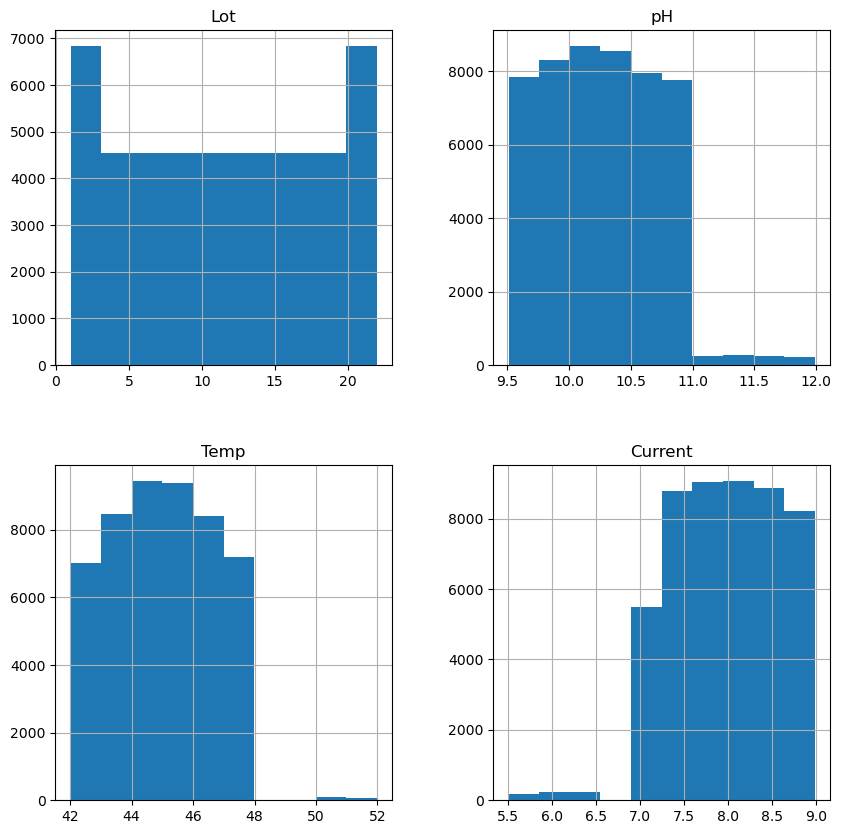

In [9]:
df.hist(figsize=(10,10))
plt.show()

In [10]:
corr_matrix = df.corr()
corr_matrix

,Lot,pH,Temp,Current
Lot,1.000000,-0.001241,-0.001545,-0.004212
pH,-0.001241,1.000000,0.001407,-0.026063
Temp,-0.001545,0.001407,1.000000,-0.000786
Current,-0.004212,-0.026063,-0.000786,1.000000


<Axes: >

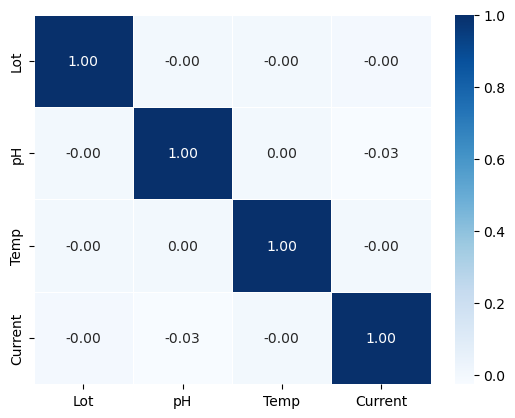

In [11]:
sns.heatmap(corr_matrix, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

In [12]:
lot_lists = df['Lot'].unique()
lot_lists

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22], dtype=int64)

In [13]:
d_lists = df['Date'].unique()
d_lists

array(['2022-09-06', '2022-09-07', '2022-09-08', '2022-09-09',
       '2022-09-10', '2022-09-13', '2022-09-14', '2022-09-15',
       '2022-09-16', '2022-09-17', '2022-09-23', '2022-09-24',
       '2022-09-27', '2022-09-28', '2022-09-29', '2022-09-30',
       '2022-10-01', '2022-10-05', '2022-10-06', '2022-10-07',
       '2022-10-08', '2022-10-12', '2022-10-13', '2022-10-14',
       '2022-10-15', '2022-10-18', '2022-10-19', '2022-10-20',
       '2022-10-21', '2022-10-22', '2022-10-25', '2022-10-26',
       '2022-10-27'], dtype=object)

In [14]:
df_er = pd.read_csv(glob.glob(new_path+'/*')[-1],index_col=False)
df_er

,Index,Date,LoT,LoT2
0,1,2022-09-06,NaN,NaN
1,2,2022-09-07,13.0,NaN
2,3,2022-09-08,1.0,22.0
3,4,2022-09-09,NaN,NaN
4,5,2022-09-10,NaN,NaN
5,6,2022-09-13,NaN,NaN
6,7,2022-09-14,5.0,NaN
7,8,2022-09-15,5.0,NaN
8,9,2022-09-16,NaN,NaN
9,10,2022-09-17,NaN,NaN


In [15]:
er_drop = df_er.dropna(thresh=3, axis=0)
lot_er_list = er_drop['LoT'].unique()
lot_er_list

array([13.,  1.,  5.,  9.,  8., 17., 19., 14., 15.])

In [16]:
d_er_list = er_drop['Date'].unique()
d_er_list

array(['2022-09-07', '2022-09-08', '2022-09-14', '2022-09-15',
       '2022-09-23', '2022-09-29', '2022-10-01', '2022-10-05',
       '2022-10-06', '2022-10-08', '2022-10-18', '2022-10-25',
       '2022-10-26'], dtype=object)

In [17]:
df_total = pd.DataFrame(columns=['pH','Temp','Current','passorfail'])

In [18]:
for d in d_lists:
    for lot in lot_lists:
        tmp = df[(df['Date']==d)&(df['Lot']==lot)]
        tmp = tmp[['pH', 'Temp','Current']]
        er_df = er_drop[(er_drop['Date']==d)&
                              ((er_drop['LoT']==lot)|(er_drop['LoT2']==lot))]
        len_error = len(er_df)
        if len_error>0:
            trr = np.full((tmp['pH'].shape), 0)
        else:
            trr = np.full((tmp['pH'].shape), 1)
        tmp['passorfail'] = trr
        df_total = df_total.append(tmp)
df_total =  df_total.apply(pd.to_numeric)
df_total

,pH,Temp,Current,passorfail
0,10.37,42.87,7.34,1
1,10.90,42.70,8.26,1
2,9.61,42.37,8.46,1
3,10.32,45.85,8.04,1
4,10.36,44.18,7.23,1
...,...,...,...,...
50089,9.79,43.52,8.55,1
50090,9.53,44.44,7.36,1
50091,9.86,46.54,8.15,1
50092,10.52,47.88,7.97,1


In [19]:
df_total.describe()

,pH,Temp,Current,passorfail
count,50094.000000,50094.000000,50094.000000,50094.000000
mean,10.273346,45.023847,7.974549,0.979339
std,0.453278,1.661687,0.601907,0.142249
min,9.510000,42.010000,5.510000,0.000000
25%,9.900000,43.670000,7.500000,1.000000
50%,10.260000,45.020000,7.990000,1.000000
75%,10.630000,46.360000,8.470000,1.000000
max,11.990000,51.980000,8.990000,1.000000


In [20]:
df_total.corr()

,pH,Temp,Current,passorfail
pH,1.000000,0.001407,-0.026063,-0.026743
Temp,0.001407,1.000000,-0.000786,-0.011250
Current,-0.026063,-0.000786,1.000000,0.014376
passorfail,-0.026743,-0.011250,0.014376,1.000000


<Axes: >

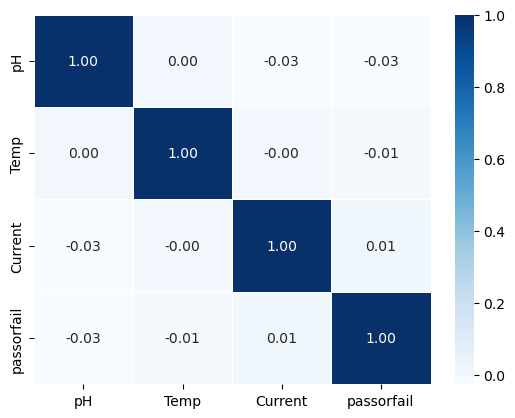

In [21]:
sns.heatmap(df_total.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

In [22]:
train_data, test_data = train_test_split(df_total, test_size=0.2)

In [24]:
train_data[['pH','Temp','Current']]

,pH,Temp,Current
11491,9.79,45.03,8.70
49234,10.52,45.40,7.91
47270,10.68,43.11,7.08
16571,10.72,44.44,7.10
6551,10.72,42.99,7.65
...,...,...,...
40951,9.54,42.32,7.30
6618,10.13,42.56,7.23
43018,10.71,45.51,8.87
7551,10.52,42.25,8.40


In [25]:
train_data[['passorfail']]

,passorfail
11491,1
49234,1
47270,1
16571,1
6551,1
...,...
40951,1
6618,1
43018,1
7551,1


In [30]:
reg = ak.StructuredDataClassifier(max_trials=3, overwrite=True)

FailedPreconditionError: . is not a directory

In [23]:
reg = ak.StructuredDataClassifier(max_trials=10, overwrite=True)
#reg.fit(train_data[['pH','Temp','Current']], train_data[['passorfail']], verbose=2, epochs=10)

FailedPreconditionError: . is not a directory

In [30]:
is_training = True
if is_training:
    reg = ak.StructuredDataClassifier(overwrite=True, max_trials=3)
    reg.fit(train_data[['pH','Temp','Current']], train_data[['passorfail']], verbose=2, epochs=10)
    model = reg.export_model()
else:
    model = tensorflow.keras.models.load_model("structured_data_classifier/best_model", custom_objects=ak.CUSTOM_OBJECTS)

FailedPreconditionError: . is not a directory